In [1]:
ENV

Base.EnvDict with 40 entries:
  "SHELL"                 => "/bin/bash"
  "WSL2_GUI_APPS_ENABLED" => "1"
  "WSL_DISTRO_NAME"       => "Ubuntu"
  "WT_SESSION"            => "0b8d4a20-15cf-4882-bbe3-2322705d6cbf"
  "NAME"                  => "KG-MobPrec-5480"
  "PWD"                   => "/home/kkganko"
  "LOGNAME"               => "kkganko"
  "MOTD_SHOWN"            => "update-motd"
  "LD_PRELOAD"            => "/usr/lib/x86_64-linux-gnu/libgomp.so.1"
  "HOME"                  => "/home/kkganko"
  "LANG"                  => "C.UTF-8"
  "WSL_INTEROP"           => "/run/WSL/8_interop"
  "LS_COLORS"             => "rs=0:di=01;34:ln=01;36:mh=00:pi=40;33:so=01;35:do…
  "WAYLAND_DISPLAY"       => "wayland-0"
  "LESSCLOSE"             => "/usr/bin/lesspipe %s %s"
  "PYTHONPATH"            => "/home/kkganko/.julia/conda/3/bin/python"
  "TERM"                  => "xterm-256color"
  "LESSOPEN"              => "| /usr/bin/lesspipe %s"
  "USER"                  => "kkganko"
  "DISPLAY"              

In [4]:
import Pkg

Status `~/oscillatory_bioreactor/Unsegregated_Bioreactor/Project.toml`
  [0c46a032] DifferentialEquations v7.11.0


  Activating project at `~/oscillatory_bioreactor/Unsegregated_Bioreactor`


In [11]:
Pkg.activate("."); Pkg.status()

Status `~/oscillatory_bioreactor/Unsegregated_Bioreactor/Project.toml`
  [1dea7af3] OrdinaryDiffEq v6.58.0


  Activating project at `~/oscillatory_bioreactor/Unsegregated_Bioreactor`


In [15]:
# Pkg.add("OrdinaryDiffEq")
Pkg.add("Plots")
Pkg.add("LaTeXStrings")
Pkg.add("ForwardDiff")

   Resolving package versions...
   Installed Xorg_libSM_jll ─────────── v1.2.3+0
   Installed GR_jll ─────────────────── v0.72.10+0
   Installed mtdev_jll ──────────────── v1.1.6+0
   Installed xkbcommon_jll ──────────── v1.4.1+1
   Installed LoggingExtras ──────────── v1.0.3
   Installed RelocatableFolders ─────── v1.0.1
   Installed gperf_jll ──────────────── v3.1.1+0
   Installed eudev_jll ──────────────── v3.2.9+0
   Installed Xorg_xcb_util_cursor_jll ─ v0.1.4+0
   Installed libevdev_jll ───────────── v1.11.0+0
   Installed libinput_jll ───────────── v1.18.0+0
   Installed Vulkan_Loader_jll ──────── v1.3.243+0
   Installed Xorg_libICE_jll ────────── v1.0.10+1
   Installed XML2_jll ───────────────── v2.11.5+0
   Installed Qt6Base_jll ────────────── v6.5.2+2
   Installed Wayland_jll ────────────── v1.21.0+1
   Installed ColorSchemes ───────────── v3.24.0
   Installed GR ─────────────────────── v0.72.10
    Updating `~/oscillatory_bioreactor/Unsegregated_Bioreactor/Project.toml`
  [9

  ✓ Xorg_libXfixes_jll
  ✓ Xorg_libxkbfile_jll
  ✓ Xorg_xcb_util_cursor_jll
  ✓ Xorg_libXrandr_jll
  ✓ Xorg_libXinerama_jll
  ✓ Xorg_libXi_jll
  ✓ Xorg_libXcursor_jll
  ✓ Libglvnd_jll
  ✓ Xorg_xkbcomp_jll
  ✓ Cairo_jll
  ✓ Xorg_xkeyboard_config_jll
  ✓ GLFW_jll
  ✓ HarfBuzz_jll
  ✓ xkbcommon_jll
  ✓ libass_jll
  ✓ Vulkan_Loader_jll
  ✓ FFMPEG_jll
  ✓ ColorSchemes
  ✓ Qt6Base_jll
  ✓ FFMPEG
  ✓ HTTP
  ✓ GR_jll
  ✓ GR
  ✓ PlotUtils
  ✓ DiffEqBase → DiffEqBaseUnitfulExt
  ✓ PlotThemes
  ✓ RecipesPipeline
  ✓ NonlinearSolve
  ✓ Plots
  ✓ Plots → UnitfulExt
  ✓ OrdinaryDiffEq
  54 dependencies successfully precompiled in 116 seconds. 205 already precompiled. 1 skipped during auto due to previous errors.
  2 dependencies precompiled but different versions are currently loaded. Restart julia to access the new versions
   Resolving package versions...
    Updating `~/oscillatory_bioreactor/Unsegregated_Bioreactor/Project.toml`
  [b964fa9f] + LaTeXStrings v1.3.0
  No Changes to `~/oscillatory_b

In [16]:
using OrdinaryDiffEq
using Plots; gr(html_output_format = :png)
using LaTeXStrings
using ForwardDiff

using LinearAlgebra

[ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
[ Info: Precompiling IJuliaExt [2f4121a4-3b3a-5ce6-9c5e-1f2673ce168a]


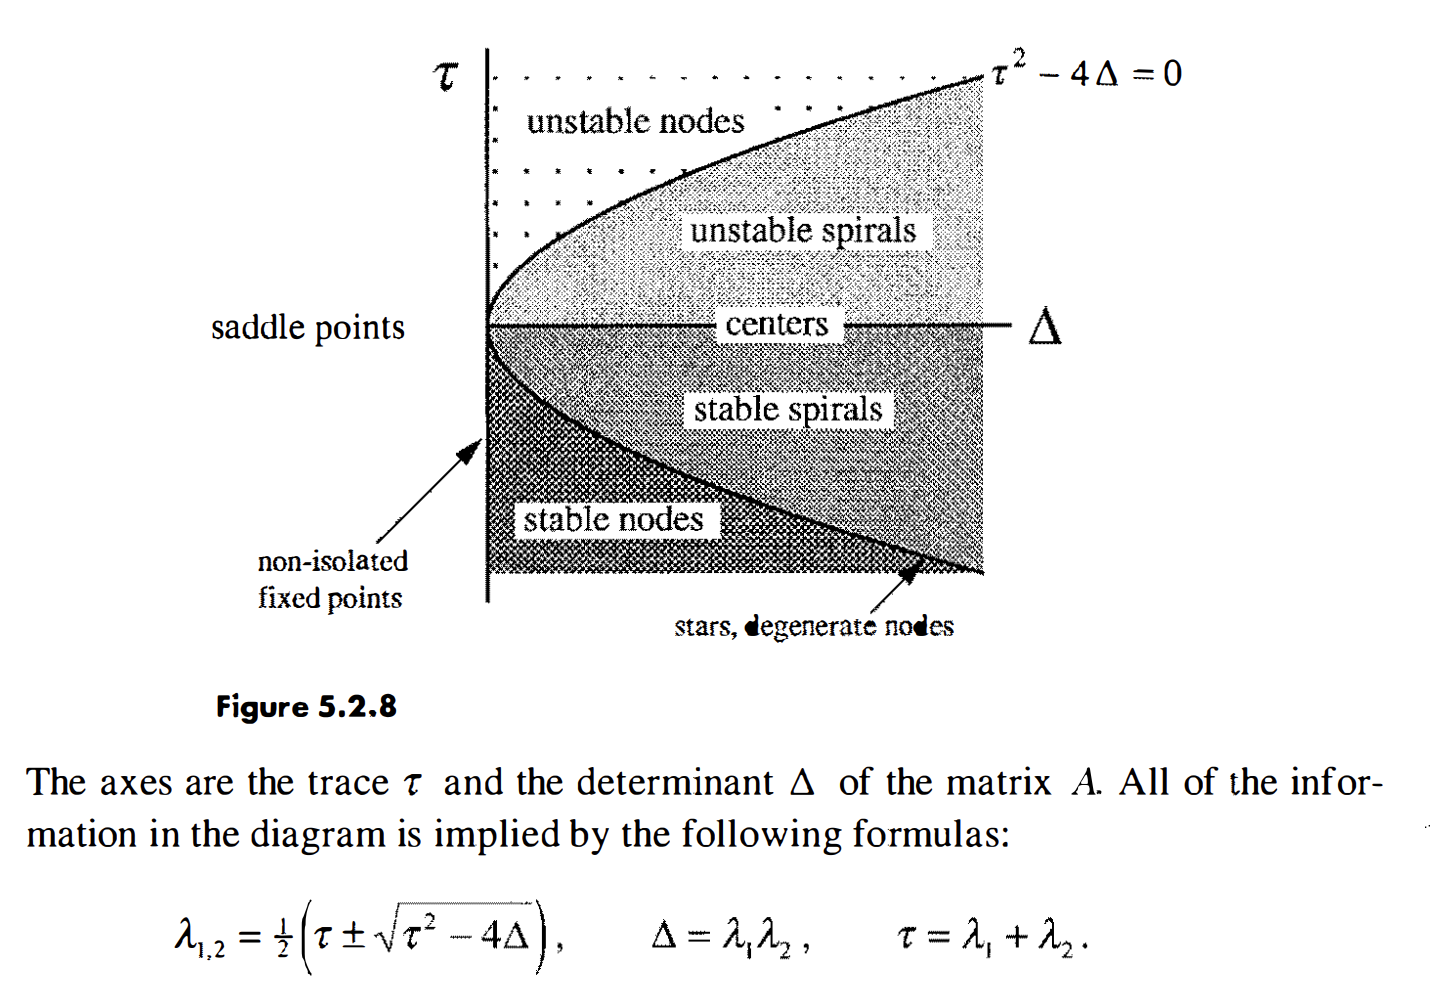

In [9]:
Y_monod(S,μ_max,K_S) = μ_max * S / (K_S + S)
Y_monod_inhib(S,μ_max,K_S,S_max) = μ_max * S / (K_S + S) * (1 - S / S_max)
Y_inhib_2nd_ord(S,μ_max,K_S,b) = μ_max * S / (K_S + S + b * S^2)
Y_binomial(S,Y_min,a,ρ) = (Y_min + a * S)^ρ

Y_binomial (generic function with 1 method)

In [ ]:
# # compute the eigvals
# res_ind = 1
# ind = length(res_list_scaled[res_ind].t)

# ∂f∂x_dim_OCoFE = ForwardDiff.jacobian(
#     (x)->yeast_PBM_MOL_OCoFE_AD(
#         x,
#         p_test_MOL,
#         res_list[res_ind].t[ind]
#     ),
#     res_list[res_ind][:,ind]
# )

# ∂f∂x_nondim_OCoFE = ForwardDiff.jacobian(
#     (x)->yeast_PBM_MOL_OCoFE_AD(
#         x,
#         p_test_MOL_scaled,
#         res_list_scaled[res_ind].t[ind]
#     ),
#     res_list_scaled[res_ind][:,ind]
# )

In [13]:
? OrdinaryDiffEq.ODEProblem

Defines an ordinary differential equation (ODE) problem. Documentation Page: https://docs.sciml.ai/DiffEqDocs/stable/types/ode_types/

## Mathematical Specification of an ODE Problem

To define an ODE Problem, you simply need to give the function $f$ and the initial condition $u_0$ which define an ODE:

$$
M \frac{du}{dt} = f(u,p,t)
$$

There are two different ways of specifying `f`:

  * `f(du,u,p,t)`: in-place. Memory-efficient when avoiding allocations. Best option for most cases unless mutation is not allowed.
  * `f(u,p,t)`: returning `du`. Less memory-efficient way, particularly suitable when mutation is not allowed (e.g. with certain automatic differentiation packages such as Zygote).

`u₀` should be an AbstractArray (or number) whose geometry matches the desired geometry of `u`. Note that we are not limited to numbers or vectors for `u₀`; one is allowed to provide `u₀` as arbitrary matrices / higher dimension tensors as well.

For the mass matrix $M$, see the documentation of `ODEFunction`.

## Problem Type

### Constructors

`ODEProblem` can be constructed by first building an `ODEFunction` or by simply passing the ODE right-hand side to the constructor. The constructors are:

  * `ODEProblem(f::ODEFunction,u0,tspan,p=NullParameters();kwargs...)`
  * `ODEProblem{isinplace,specialize}(f,u0,tspan,p=NullParameters();kwargs...)` : Defines the ODE with the specified functions. `isinplace` optionally sets whether the function is inplace or not. This is determined automatically, but not inferred. `specialize` optionally controls the specialization level. See the [specialization levels section of the SciMLBase documentation](https://docs.sciml.ai/SciMLBase/stable/interfaces/Problems/#Specialization-Levels) for more details. The default is `AutoSpecialize`.

For more details on the in-place and specialization controls, see the ODEFunction documentation.

Parameters are optional, and if not given, then a `NullParameters()` singleton will be used which will throw nice errors if you try to index non-existent parameters. Any extra keyword arguments are passed on to the solvers. For example, if you set a `callback` in the problem, then that `callback` will be added in every solve call.

For specifying Jacobians and mass matrices, see the `ODEFunction` documentation.

### Fields

  * `f`: The function in the ODE.
  * `u0`: The initial condition.
  * `tspan`: The timespan for the problem.
  * `p`: The parameters.
  * `kwargs`: The keyword arguments passed onto the solves.

## Example Problem

```julia
using SciMLBase
function lorenz!(du,u,p,t)
 du[1] = 10.0(u[2]-u[1])
 du[2] = u[1]*(28.0-u[3]) - u[2]
 du[3] = u[1]*u[2] - (8/3)*u[3]
end
u0 = [1.0;0.0;0.0]
tspan = (0.0,100.0)
prob = ODEProblem(lorenz!,u0,tspan)

# Test that it worked
using OrdinaryDiffEq
sol = solve(prob,Tsit5())
using Plots; plot(sol,vars=(1,2,3))
```

## More Example Problems

Example problems can be found in [DiffEqProblemLibrary.jl](https://github.com/SciML/DiffEqProblemLibrary.jl).

To use a sample problem, such as `prob_ode_linear`, you can do something like:

```julia
#] add ODEProblemLibrary
using ODEProblemLibrary
prob = ODEProblemLibrary.prob_ode_linear
sol = solve(prob)
```

---

```
ODEProblem(f::ODEFunction,u0,tspan,p=NullParameters(),callback=CallbackSet())
```

Define an ODE problem from an [`ODEFunction`](@ref).


In [ ]:
# params to try (from Lexi's work)
μ_max = 0.3
K_S = 1.75
Y_min = 0.1
a = 0.03
ρ = 0.75



# trying controllers in Julia

In [ ]:
# forward solve of the system with step change at t=0.5
abstract type Perturbation <: Function end
Base.length(p::Perturbation) = length(p.t)

struct PiecewiseConstantVariation{T <: AbstractArray} <: Perturbation
    t::T
end

function (c::PiecewiseConstantVariation)(t_val, u)
    (; t) = c
    i = searchsortedlast(t, t_val)
    if i == 0
        return u[1]
    else
        return u[i]
    end
end

struct PiecewiseLinearVariation{T <: AbstractArray} <: Perturbation
    t::T
end

function (c::PiecewiseLinearVariation)(t_val,u)
    (; t) = c
    i = searchsortedlast(t, t_val)
    if i == 0
        return u[1]
    elseif i == length(t)
        return u[end]
    else
        return @inbounds u[i] + (t_val - t[i]) * (u[i+1] - u[i]) / (t[i+1] - t[i])
    end
end
# state eqns
f(x,u,A,B) = A*x + B*u

# define system to solve
function f_LTI(
        x::Vector{Float64},
        p::Vector{Float64},
        t::Float64;
        u_t = p_pwl::PiecewiseLinearVariation,
        A = LinearAlgebra.I,
        B = LinearAlgebra.I
)
    # need vec() to take matrix type of f(...) output to vector type
    dx = vec(f(x,u_t(t,p),A,B))
end

N_t_interior = 10 # num time-points w/o considering time horizon endpoints
tf = 5.0
t_list_rand = tf .* vcat([0.0,1.0],rand(N_t_interior))
N_t = length(t_list_rand)
t_list_scaledsorted = sort(t_list_rand)
p_pwc = PiecewiseConstantVariation(t_list_scaledsorted)
p_pwl = PiecewiseLinearVariation(t_list_scaledsorted)
u_max = 10.0
λ_t_stops = u_max .* (rand(N_t) .- 0.5)
λ_t_c = map(t->p_pwc(t,zeros(length(λ_t_stops))),t_list_scaledsorted)
λ_t_pwc = map(t->p_pwc(t,λ_t_stops),t_list_scaledsorted)
λ_t_pwl = map(t->p_pwl(t,λ_t_stops),t_list_scaledsorted)

# solve the system using time integrators from Julia OrdinaryDiffEq.jl
T_STOPS = t_list_scaledsorted
tspan = (0.0,maximum(T_STOPS))
Δt_res = 0.01
T_SAVEAT = sort(vcat(T_STOPS,tspan[1]:Δt_res:tspan[2]))
x0 = [0.5;0.5]
f_LTI(x0,λ_t_stops,0.0; u_t = p_pwl, A = A, B = B)


t_test = range(0,tf,500)

##### NO INPUT RESULTS #####
p_λ_c = scatter(
    t_test,
    map(t->p_pwc(t,λ_t_c),t_test),
    label = "no perturbation",
#     ylim = (0,1),
    xlim = (0,tf)
)
scatter!(
    p_λ_c,
    t_list_scaledsorted,
    λ_t_c,
    label = ""
)
# simulate for openloop dynamics
alg = Vern8()
prob = ODEProblem(
    (x,p,t)->f_LTI(x,p,t; u_t = p_pwc, A = A, B = B),
    x0,
    tspan,
    zeros(length(λ_t_stops)),
    saveat = T_SAVEAT,
    tstops = T_STOPS
)
sol = solve(prob,alg)
plot!(
    p_λ_c,
    sol,
    label = [L"x_1" L"x_2"],
    xlabel = "t",
    ylabel = "x",
    xlim = (0,tf),
    legend = :best,
    framestyle = :box,
    title = L"Random 2x2 state matrix $A$ and 2x1 input matrix $B$"
)

##### PIECEWISE CONSTANT RESULTS #####
p_λ_pwc = scatter(
    t_test,
    map(t->p_pwc(t,λ_t_stops),t_test),
    label = "pwc perturbations",
    xlim = (0,tf)
)
scatter!(
    p_λ_pwc,
    t_list_scaledsorted,
    λ_t_pwc,
    label = ""
)
# simulate for pwc disturbance
alg = Vern8()
prob = ODEProblem(
    (x,p,t)->f_LTI(x,p,t; u_t = p_pwc, A = A, B = B),
    x0,
    tspan,
    λ_t_stops,
    saveat = T_SAVEAT,
    tstops = T_STOPS
)
sol = solve(prob,alg)
plot!(
    p_λ_pwc,
    sol,
    label = [L"x_1" L"x_2"],
    xlabel = "t",
    ylabel = "x",
    xlim = (0,tf),
    legend = :best,
    framestyle = :box,
    title = L"Random 2x2 state matrix $A$ and 2x1 input matrix $B$"
)

##### PIECEWISE LINEAR RESULTS #####
p_λ_pwl = scatter(
    t_test,
    map(t->p_pwl(t,λ_t_stops),t_test),
    label = "pwl perturbations",
    xlim = (0,tf)
)
scatter!(
    p_λ_pwl,
    t_list_scaledsorted,
    λ_t_pwl,
    label = ""
)
# simulate for pwl disturbance
alg = Vern8()
prob = ODEProblem(
    (x,p,t)->f_LTI(x,p,t; u_t = p_pwl, A = A, B = B),
    x0,
    tspan,
    λ_t_stops,
    saveat = T_SAVEAT,
    tstops = T_STOPS
)
sol = solve(prob,alg)
plot!(
    p_λ_pwl,
    sol,
    label = [L"x_1" L"x_2"],
    xlabel = "t",
    ylabel = "x",
    xlim = (0,tf),
    legend = :best,
    framestyle = :box,
    title = L"Random 2x2 state matrix $A$ and 2x1 input matrix $B$"
)

# all plots
plot(
    p_λ_c,
    p_λ_pwc,
    p_λ_pwl,
    layout = (3,1), #@layout [A; B; C],
    size = (600,900)
)